RANDOM LINEAR CLASSIFIER

In [11]:
## importing the libraries; numpy(scientific computing) and matplotlib(for plotting)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

In [12]:
np.random.seed(0) ## Makes random generation predictable.

In [13]:
# here normal --> Normal Gaussian distribution. Loc is basically the mean so the whisker length is centered around 5. Scale 1 means that
# all the values will be between 4 and 6, size is basically the size of the array. 
# Eg: for flappiness: array([8.21, 7.95, 9.10, 7.32, 8.75, 8.12, 6.89, 7.58, 8.66, 7.44])

dogs_whisker_length = np.random.normal(loc=5, scale=1, size=10)
dogs_ear_flappines_index = np.random.normal(loc=8, scale=1, size=10)

In [14]:

cats_whisker_length = np.random.normal(loc=8, scale=1, size=10)
cats_ear_flappines_index = np.random.normal(loc=5, scale=1, size=10)

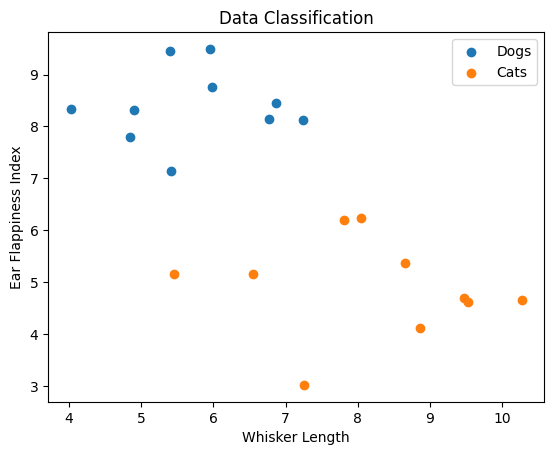

In [15]:
plt.scatter(dogs_whisker_length, dogs_ear_flappines_index, label="Dogs")
plt.scatter(cats_whisker_length, cats_ear_flappines_index, label="Cats")
plt.xlabel("Whisker Length")
plt.ylabel("Ear Flappiness Index")
plt.title("Data Classification")
plt.legend()
plt.show()

In [7]:
# Implementing random linear classifier algo

# 1) Take random values of theta and theta0 in every iteration of K.
# 2) For each iteration calculate the error by doing theta0 + theta(transpose)X 
# 3) If its greator than 0 then +1 and <0 then -1
# For dogs the value should be +1 and for cats it should be -1 if its otherwise we add it to the error

In [19]:
## Coding cross validation error to find the most optimal value of K to test the algorithm.

def cross_validation_error(dogs_data, cats_data, k_values, d, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    avg_errors = []

    for k in k_values:
        errors = []

        for train_index, val_index in kf.split(dogs_data):
            X_train_fold = np.vstack((dogs_data[train_index], cats_data[train_index]))
            y_train_fold = np.hstack((np.ones(len(train_index)), np.zeros(len(train_index))))
            X_test_fold = np.vstack((dogs_data[val_index], cats_data[val_index]))
            y_test_fold = np.hstack((np.ones(len(val_index)), np.zeros(len(val_index))))
            
            final_theta0, final_theta = random_linear_classifier(X_train_fold[y_train_fold == 1], X_train_fold[y_train_fold == 0], k, d)
            
            errors.append(calculate_error(X_test_fold[y_test_fold == 1], X_test_fold[y_test_fold == 0], final_theta0, final_theta))

        avg_errors.append(np.mean(errors))

    print(avg_errors)
    best_k = k_values[np.argmin(avg_errors)]
    return best_k

    
k_values = [1,5,50,100,200,350]
            

best_k = cross_validation_error(dogs_data, cats_data, k_values, d=2)

[np.float64(2.0), np.float64(1.2), np.float64(0.2), np.float64(0.2), np.float64(0.4), np.float64(0.2)]


In [24]:
best_k

50

In [18]:
def calculate_error(dogs, cats, theta0, theta):
    error = 0
    for dog_sample in dogs:
        # Here Shape of theta is 1*2 and Shape of dog_sample is 2*1 so final is a scalar
        if(np.dot(theta, dog_sample) + theta0 <= 0):
            error +=1

    for cat_sample in cats:
        if(np.dot(theta, cat_sample) + theta0 > 0):
            error +=1
    
    return error

In [17]:
def random_linear_classifier(data_dogs, data_cats, k, d): #here d is the number of dimensions which is 2 in this case

    min_error = float('inf')
    final_theta0 = None    
    final_theta = None   

    for _ in range(k):
        theta0 = np.random.normal()
        theta = np.random.normal(size=d)

        local_error = calculate_error(data_dogs, data_cats, theta0, theta)

        if(local_error < min_error):
            min_error = local_error
            final_theta = theta
            final_theta0 = theta0

    return final_theta0, final_theta


In [9]:
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappines_index)).T
cats_data = np.vstack((cats_whisker_length, cats_ear_flappines_index)).T

In [20]:
best_theta0, best_theta = random_linear_classifier(dogs_data, cats_data, k=best_k, d=2)

In [21]:
best_theta0, best_theta

(-0.7865690938424595, array([-0.88341647,  0.89812909]))

In [22]:
# Linspace is used to create 100 values between 2 and 10
x_vals = np.linspace(2,10,100)
# ax+by+c = 0 ---> y = (-c-ax)/b
y_vals = (-best_theta0/best_theta[1]) - (best_theta[0]/best_theta[1]) * x_vals

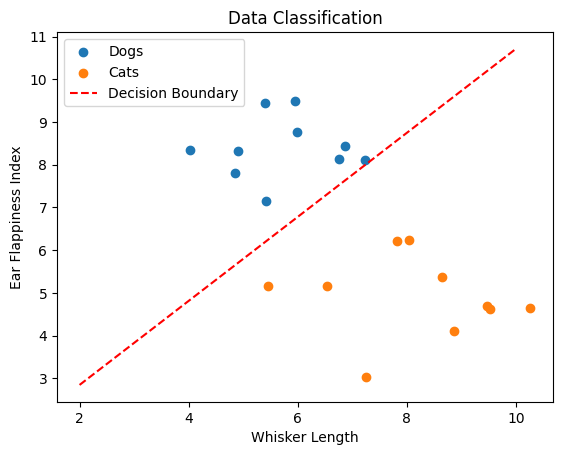

In [23]:
plt.scatter(dogs_whisker_length, dogs_ear_flappines_index, label="Dogs")
plt.scatter(cats_whisker_length, cats_ear_flappines_index, label="Cats")
plt.plot(x_vals, y_vals, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel("Whisker Length")
plt.ylabel("Ear Flappiness Index")
plt.title("Data Classification")
plt.legend()
plt.show()